# Growth accounting for manufacturing industry in Singapore

In [33]:
import pandas as pd
def normalize_data(path: str, header: int = 10, nrows: int = 23) -> pd.DataFrame:
  df = pd.read_csv(path, header=header, index_col=0, nrows=nrows)
  df.columns = df.columns.astype(int).astype(str)
  for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")
  return df



## Value Addition (Y)

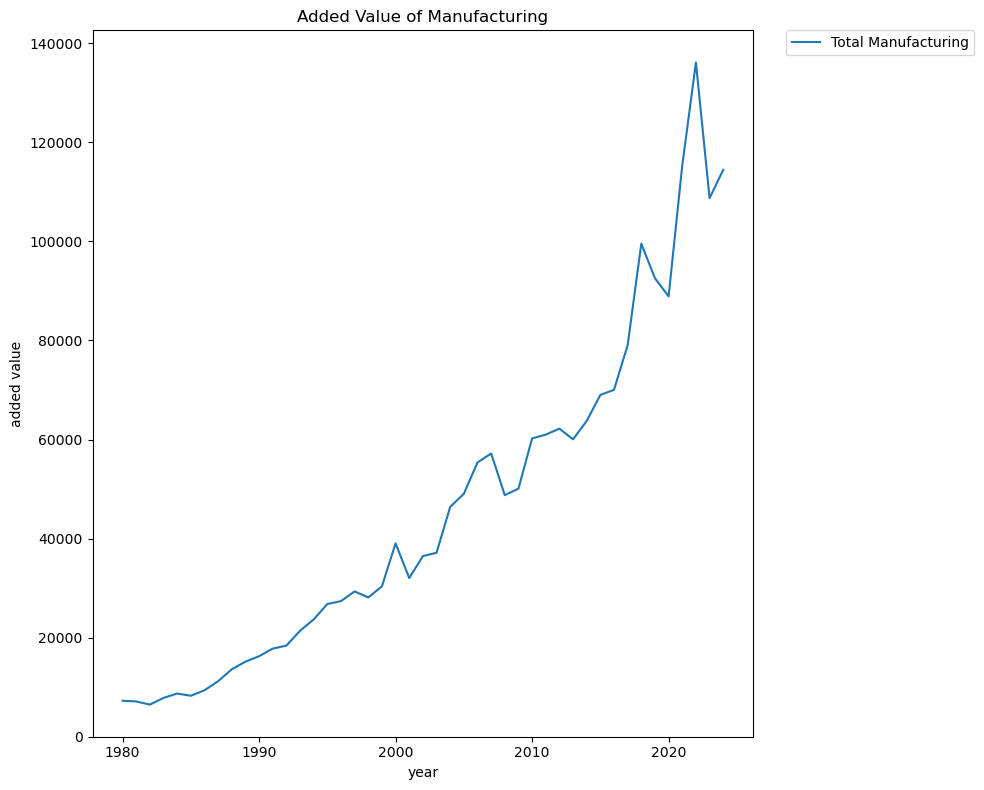

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Refer to https://www.singstat.gov.sg/find-data/search-by-theme/industry/manufacturing/latest-data

added_value_total_manufacturing = normalize_data("./data/sg_manufac_added_values_by_industry.csv").loc["Total Manufacturing"].sort_index()

ax = added_value_total_manufacturing.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Added Value of Manufacturing')
plt.xlabel('year')
plt.ylabel('added value')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()


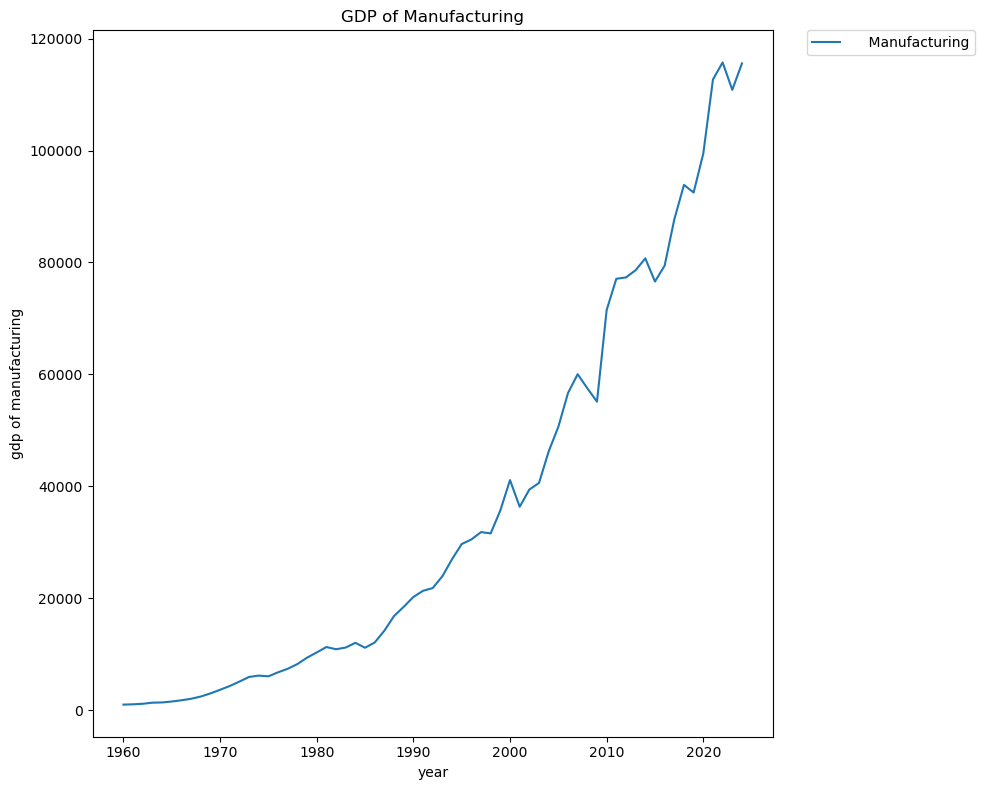

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

gdp_manufacturing = normalize_data("./data/sg_gdp_in_chained_by_industry.csv").iloc[2, :].sort_index()

ax = gdp_manufacturing.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('GDP of Manufacturing')
plt.xlabel('year')
plt.ylabel('gdp of manufacturing')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()


## Employment (L)

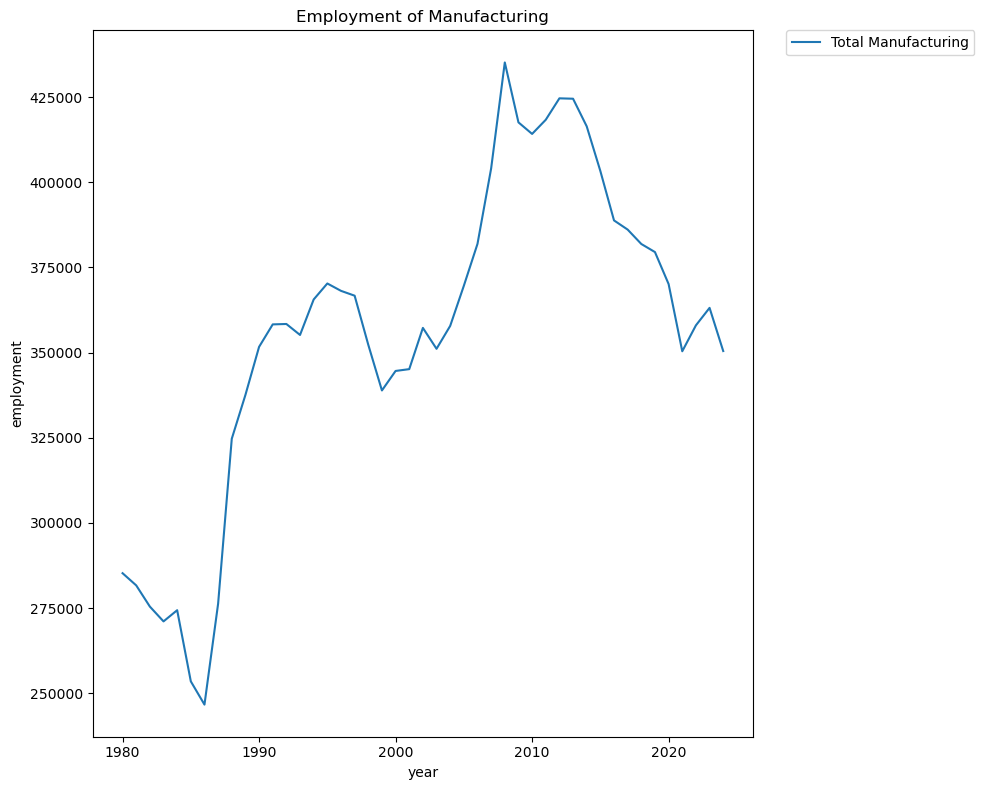

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Refer to https://www.singstat.gov.sg/find-data/search-by-theme/industry/manufacturing/latest-data

employment_total_manufacturing = normalize_data("./data/sg_manufac_workers_by_industry.csv").loc["Total Manufacturing"].sort_index()


ax = employment_total_manufacturing.plot(figsize=(10, 8))

# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Employment of Manufacturing')
plt.xlabel('year')
plt.ylabel('employment')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

# 表示
plt.show()


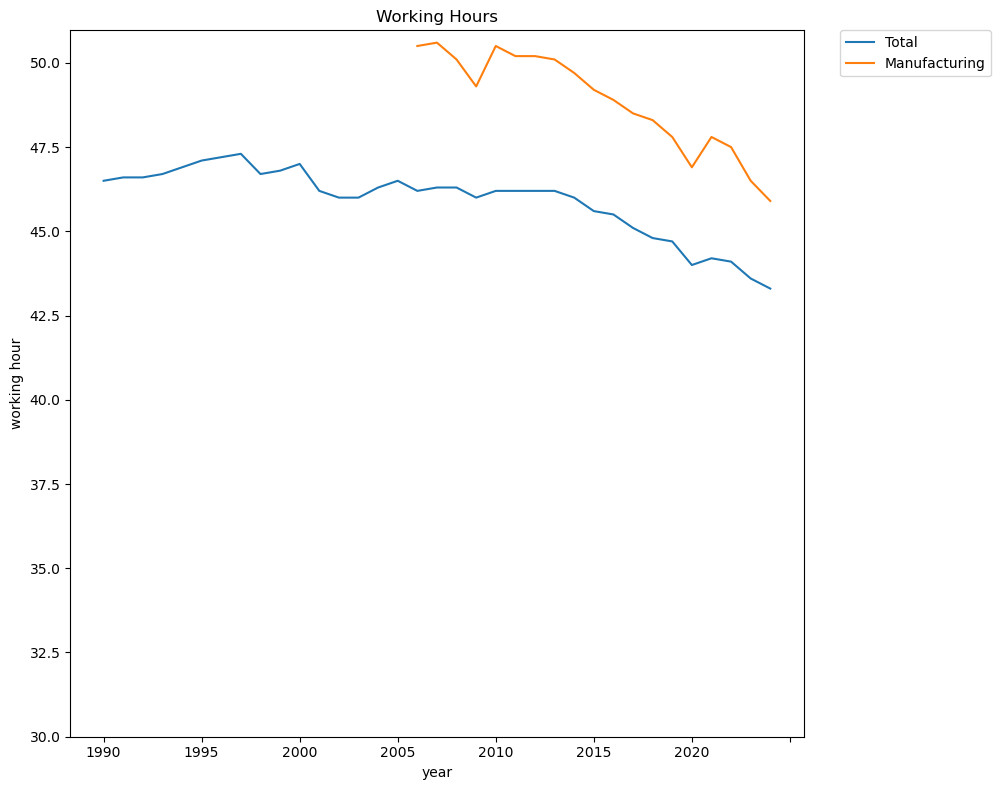

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Refer to https://www.singstat.gov.sg/find-data/search-by-theme/industry/manufacturing/latest-data

# employment_df = pd.read_csv("./data/sg_manufac_workers_by_industry.csv", header=9, index_col=0, nrows=23)

working_hours_df = normalize_data("./data/sg_working_hours.csv", nrows=15)

working_hours = pd.DataFrame({
  "Total": working_hours_df.iloc[0, :],
  "Manufacturing": working_hours_df.iloc[1, :]
  }).sort_index()


ax = working_hours.plot(figsize=(10, 8))


# 凡例をプロットの外に配置 (右上に配置)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# タイトルと軸ラベルを追加（必要に応じて）
plt.title('Working Hours')
plt.xlabel('year')
plt.ylabel('working hour')

# レイアウトを調整して、凡例がグラフを隠さないようにする
plt.tight_layout()

plt.ylim(30)

# 表示
plt.show()


## Capital(K)

In [38]:
import requests
import pandas as pd

def to_dataset(url: str):
  response = requests.get(url)
  data = response.json()

  # レコード部分を抽出
  records = data["result"]["records"]

  # pandas DataFrame へ変換
  df = pd.DataFrame(records)

  # 数値列を float に変換（JSONからは文字列で来ることが多い）
  for col in df.columns:
    if col not in ["_id", "DataSeries"]:
      df[col] = pd.to_numeric(df[col], errors="coerce")

  # DataSeries を index にすると見やすい
  df.set_index("DataSeries", inplace=True)
  df.drop(columns="_id", inplace=True)

  return df

In [39]:
total_net_capital_stock = normalize_data("./data/sg_net_capital_stock.csv", nrows=15).loc["Total"].sort_index()
total_net_capital_stock


1960       8841.9
1961       9557.4
1962      10469.7
1963      11674.5
1964      13198.5
          ...    
2020    1336734.5
2021    1378498.8
2022    1421263.6
2023    1458020.5
2024    1495057.0
Name: Total, Length: 65, dtype: float64

In [40]:

dataset_id = "d_d0db56a7c201c9a1e42c846d4fe6da8f"
url = "https://data.gov.sg/api/action/datastore_search?resource_id="  + dataset_id 
gdp_data = to_dataset(url)        

gdp = gdp_data.iloc[0, :]
manufacturing = gdp_data.iloc[2, :]

gdp_share_of_manufacturing = pd.Series(manufacturing/gdp, name="share")
gdp_share_of_manufacturing.index = gdp_share_of_manufacturing.index.astype(int).astype(str)
gdp_share_of_manufacturing

1960    0.105775
1961    0.103003
1962    0.107302
1963    0.116946
1964    0.128124
          ...   
2020    0.196540
2021    0.206331
2022    0.196555
2023    0.169756
2024    0.163327
Name: share, Length: 65, dtype: float64

In [41]:

deflators = normalize_data("./data/sg_gdp_deflator_by_industry.csv")
gdp_deflator = deflators.iloc[0].sort_index()["1980": ]
manufacturing_deflator = deflators.iloc[2].sort_index()["1980": ]

operating_surplus = normalize_data("./data/sg_operating_surplus.csv")
operating_surplus_total = operating_surplus.loc["Total"].sort_index()
operating_surplus_manufacturing = operating_surplus.loc["  Manufacturing"].sort_index()


real_operating_surplus_total = operating_surplus_total * 100 / gdp_deflator
real_operating_surplus_manufacturing = operating_surplus_manufacturing * 100 / manufacturing_deflator

surplus_share_of_manufacturing = real_operating_surplus_manufacturing / real_operating_surplus_total
nominal_surplus_share_of_manufacturing = operating_surplus_manufacturing / operating_surplus_total

surplus_share_of_manufacturing

1980    0.241686
1981    0.251553
1982    0.221116
1983    0.213765
1984    0.208562
1985    0.193480
1986    0.224550
1987    0.229851
1988    0.234767
1989    0.223693
1990    0.216974
1991    0.219887
1992    0.206139
1993    0.211477
1994    0.220644
1995    0.238072
1996    0.223628
1997    0.217913
1998    0.225424
1999    0.251430
2000    0.286660
2001    0.239872
2002    0.257344
2003    0.255917
2004    0.265163
2005    0.267389
2006    0.274234
2007    0.261412
2008    0.227602
2009    0.228225
2010    0.264954
2011    0.267943
2012    0.257189
2013    0.243531
2014    0.247664
2015    0.236126
2016    0.242263
2017    0.259916
2018    0.278205
2019    0.263898
2020    0.288441
2021    0.300188
2022    0.288119
2023    0.278228
2024    0.277964
dtype: float64

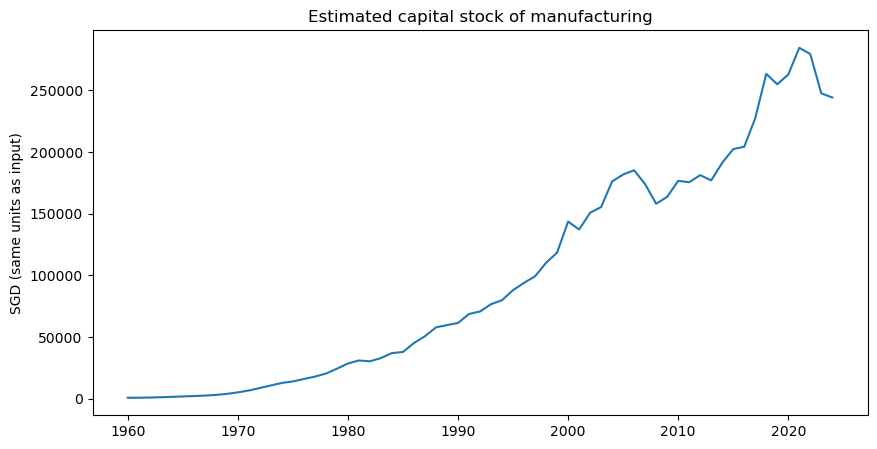

In [42]:
import matplotlib.pyplot as plt

capital_stock_share_of_manufacturing = total_net_capital_stock * gdp_share_of_manufacturing

capital_stock_share_of_manufacturing_by_surplus = total_net_capital_stock * surplus_share_of_manufacturing
capital_stock_share_of_manufacturing_by_nominal_surplus = total_net_capital_stock * nominal_surplus_share_of_manufacturing

# グラフ化（必要なら）

capital_stock_share_of_manufacturing.plot(figsize=(10,5))
plt.title("Estimated capital stock of manufacturing")
plt.ylabel("SGD (same units as input)")
plt.show()


## Labor/Capital Distribution (α,β)

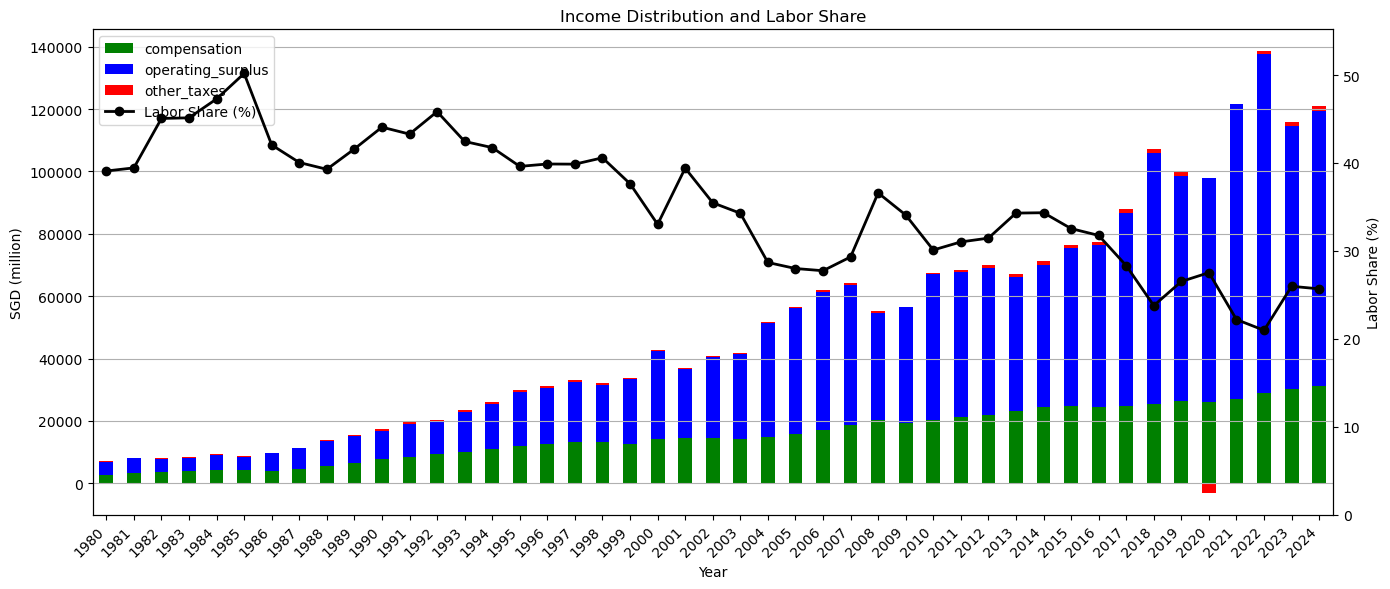

In [43]:
# refer to https://www.singstat.gov.sg/find-data/search-by-theme/economy/national-accounts/visualising-data/income-components-of-gdp-dashboard
# To derive this values by year, you have to combine three data set from compensation of employee, operating surplus, and taxes less subsidies on production and import.
import pandas as pd
import matplotlib.pyplot as plt


compensation_manufacture = normalize_data("./data/sg_compensation_for_workers.csv", nrows=25).iloc[1, :]
operating_surplus_manufacture = normalize_data("./data/sg_operating_surplus.csv", nrows=25).iloc[1, :]
other_taxes_manufacture = normalize_data("./data/sg_other_taxes_less_subsidies.csv", nrows=25).iloc[1, :]

# --- DataFrame 作成 ---
df = pd.DataFrame({
  "compensation": compensation_manufacture,
  "operating_surplus": operating_surplus_manufacture,
  "other_taxes": other_taxes_manufacture
}).sort_index()

# --- 労働分配率（%）を計算 ---
df["labor_share"] = df["compensation"] / (df["compensation"] + df["operating_surplus"] + df["other_taxes"])
labor_distribution = df["labor_share"]
labor_distribution_pct = df["labor_share"] * 100  # % 表示に変換

# --- プロット ---
fig, ax1 = plt.subplots(figsize=(14,6))

# 積み上げ棒グラフ（左軸）
df[["compensation", "operating_surplus", "other_taxes"]].plot(
  kind="bar", stacked=True, ax=ax1, color=["green", "blue", "red"], legend=True
)
ax1.set_ylabel("SGD (million)")
ax1.set_xlabel("Year")
ax1.set_title("Income Distribution and Labor Share")
ax1.grid(axis="y")

# secondary y-axis を使って折れ線（右軸）
ax2 = ax1.twinx()

# x の位置を棒と合わせる（bar の中心は 0..len-1）
x = range(len(df))

# 折れ線を目立たせる（色・線幅・マーカー・zorder）
ax2.plot(
  x, labor_distribution_pct.values,
  color="black", marker="o", linewidth=2, markersize=6, zorder=3, label="Labor Share (%)"
)

# 右軸ラベルと範囲（見やすいように余裕を持たせる）
min_v = max(0, labor_distribution_pct.min() * 0.9)
max_v = labor_distribution_pct.max() * 1.1
ax2.set_ylim(min_v, max_v)
ax2.set_ylabel("Labor Share (%)")

# x 軸ラベルを年に戻す（回転で見やすく）
ax1.set_xticks(x)
ax1.set_xticklabels(df.index.astype(int), rotation=45, ha="right")

# secondary axis を透明にして折れ線がバーの上に描かれるようにする
ax2.set_zorder(ax1.get_zorder() + 1)
ax2.patch.set_visible(False)

ax2.set_ylim(0)

# 凡例（左右両方の凡例をまとめて表示）
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper left")

plt.tight_layout()
plt.show()



## Calculation

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def growth_accounting_visualizer(real_value_added, capital_input, labor_input, labor_share):
  Y = real_value_added
  K = capital_input
  L = labor_input

  alpha = 1 - labor_share  # 資本分配率

  gY = np.log(Y).diff()
  gK = np.log(K).diff()
  gL = np.log(L).diff()
  gA = gY - ((1 - alpha) * gL + alpha * gK)

  # 成長寄与度を計算（単位：%）
  labor_contrib = (1 - alpha) * gL * 100
  capital_contrib = alpha * gK * 100
  tfp_contrib = gA * 100

  # データをまとめる
  contrib_df = pd.DataFrame({
    'labor contribution': labor_contrib,
    'capital contribution': capital_contrib,
    'TFP contribution': tfp_contrib,
  }, index=Y.index).dropna()

  # プロット
  plt.figure(figsize=(10,6))
  contrib_df.plot(kind='bar', stacked=True, figsize=(12,6))

  plt.title("contribution to growth of Manufacturing industry in Singapore", fontsize=14)
  plt.xlabel("year", fontsize=12)
  plt.ylabel("growth rate(%)", fontsize=12)
  plt.legend(loc='best')
  plt.grid(True, linestyle='--', alpha=0.5)
  plt.tight_layout()
  plt.show()


<Figure size 1000x600 with 0 Axes>

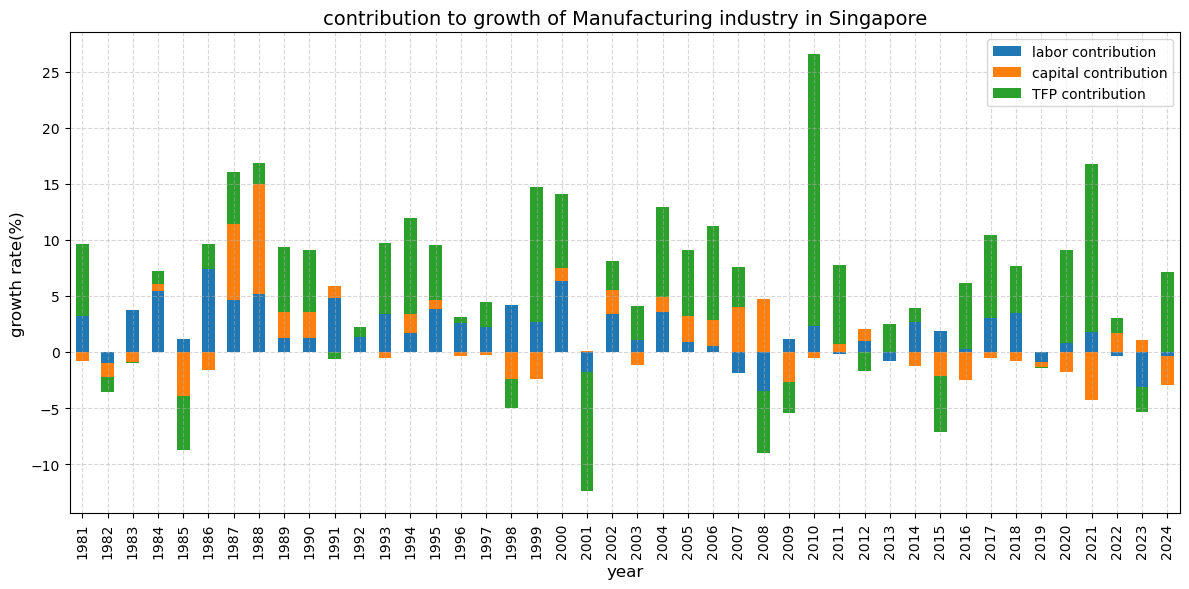

In [45]:
# long term

real_gdp = gdp_manufacturing.loc["1980": ]
employment = employment_total_manufacturing.loc["1980": ] 
capital = capital_stock_share_of_manufacturing.loc["1980": ]
labor_share = labor_distribution.loc["1980": ]

growth_accounting_visualizer(real_gdp, employment, capital, labor_share)


<Figure size 1000x600 with 0 Axes>

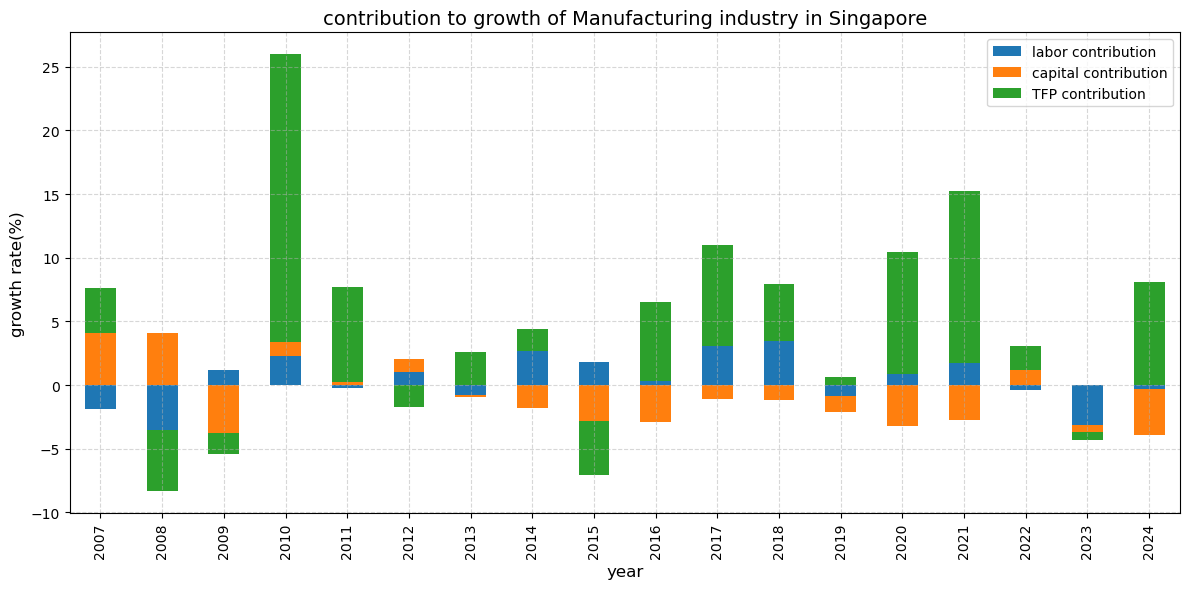

In [46]:
# Include hours

real_gdp = gdp_manufacturing.loc["2006": ]
employment = employment_total_manufacturing.loc["2006": ] 
hours = working_hours["Manufacturing"].loc["2006": ] * 52.143
capital = capital_stock_share_of_manufacturing.loc["2006": ]
labor_share = labor_distribution.loc["2006": ]

growth_accounting_visualizer(real_gdp, employment*hours, capital, labor_share)


<Figure size 1000x600 with 0 Axes>

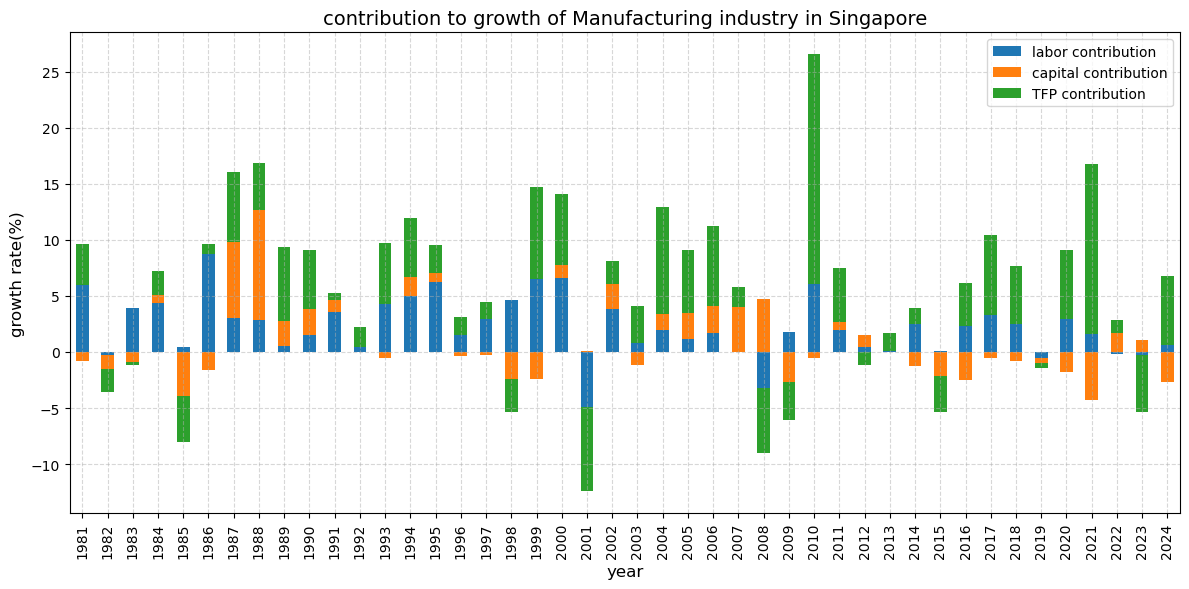

In [47]:
# Based on Surplus share

real_gdp = gdp_manufacturing.loc["1980": ]
employment = employment_total_manufacturing.loc["1980": ] 
capital = capital_stock_share_of_manufacturing_by_surplus.loc["1980": ]
labor_share = labor_distribution.loc["1980": ]

growth_accounting_visualizer(real_gdp, employment, capital, labor_share)

<Figure size 1000x600 with 0 Axes>

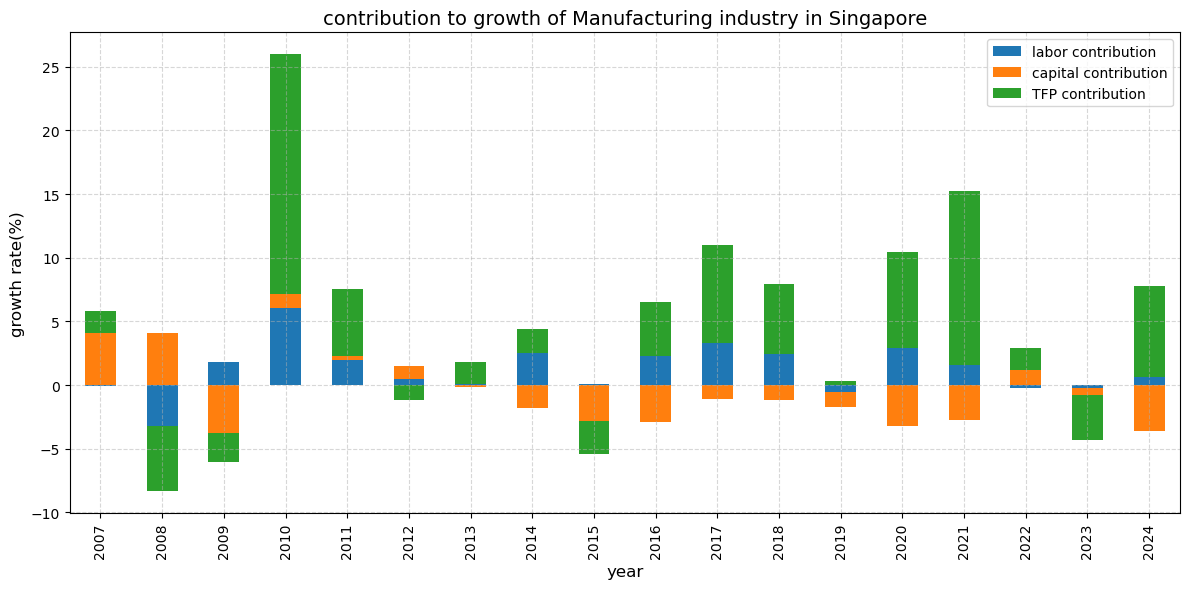

In [48]:
# Include hours & Based on Surplus share

real_gdp = gdp_manufacturing.loc["2006": ]
employment = employment_total_manufacturing.loc["2006": ] 
hours = working_hours["Manufacturing"].loc["2006": ] * 52.143
capital = capital_stock_share_of_manufacturing_by_surplus.loc["2006": ]
labor_share = labor_distribution.loc["2006": ]

growth_accounting_visualizer(real_gdp, employment*hours, capital, labor_share)

<Figure size 1000x600 with 0 Axes>

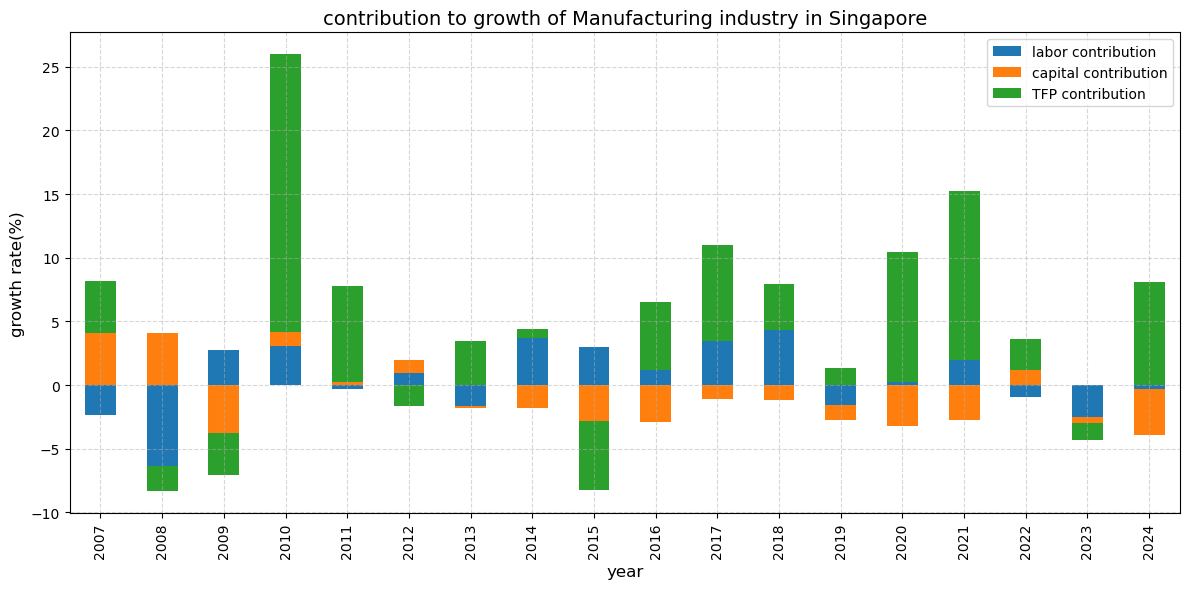

In [49]:
# Include hours & Based on nominal surplus share

real_gdp = gdp_manufacturing.loc["2006": ]
employment = employment_total_manufacturing.loc["2006": ] 
hours = working_hours["Manufacturing"].loc["2006": ] * 52.143
capital = capital_stock_share_of_manufacturing_by_nominal_surplus.loc["2006": ]
labor_share = labor_distribution.loc["2006": ]

growth_accounting_visualizer(real_gdp, employment*hours, capital, labor_share)